In [5]:
#%%

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import pandas as pd
import stanza
import pandas as pd 
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 2000
pd.options.display.max_colwidth = 2000



import sentiment_score as ss
import importlib
#%%


import re


In [6]:

nlp = stanza.Pipeline('en', processors='tokenize,pos')
def clean_text(lor):
    lor = re.sub(r"\n"," ",lor)
    lor = re.sub(r"\"","",lor)
    lor = re.sub(r"\\","",lor)
    lor = re.sub(r"\(","",lor)
    lor = re.sub(r"\)","",lor)
    lor = re.sub(r"\s+"," ",lor)
    return lor


def tokenize_sentences(text):
    sentence_list = sent_tokenize(text)
    return sentence_list

def insert_space(text):
    new_text = re.sub(r"([a-zA-Z\)]\.)(\w)", r"\1 \2", text, count=50)
    new_text = re.sub(r"([0-9]\.)([A-Z]+)", r"\1 \2", new_text, count=20)
    new_text = re.sub(
        r"(?:(^[0-9]\.|^\s[0-9]\.))([a-zA-Z]+)", r"\1 \2", new_text, count=20
    )
    new_text = re.sub(r"(?:(^[0-9]\s|^\s[0-9]\s))", r"", new_text, count=20)
    new_text = re.sub(r"(?:\s[0-9]\.\s|^[0-9]\.\s)", r" ", new_text, count=20)
    new_text = new_text.lstrip().rstrip()
    return new_text


def get_df_sentence(df, column_name):
    df[column_name] = df[column_name].astype("string")
    df[column_name] = df[column_name].apply(insert_space)
    sentences = df[column_name].apply(tokenize_sentences)
    df_sentence = pd.DataFrame(sentences.tolist(), index=df.lor_id).stack()
    df_sentence = df_sentence.reset_index()[[0, "lor_id"]]
    df_sentence.columns = ["sentence_split", "lor_id"]
    df_sentence["sentence_split"] = df_sentence["sentence_split"].map(
        lambda x: x.lstrip(".").rstrip(".")
    )
    df_sentence["sentence_split"] = df_sentence["sentence_split"].apply(str.lower)
    return df_sentence



2022-09-16 19:44:29 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |

2022-09-16 19:44:29 INFO: Use device: cpu
2022-09-16 19:44:29 INFO: Loading: tokenize
2022-09-16 19:44:29 INFO: Loading: pos
2022-09-16 19:44:29 INFO: Done loading processors!


In [7]:

#%%


# df1  = pd.read_excel(".\\Data\\alperen_100.xlsx")
# df2  = pd.read_excel(".\\Data\\Master.xlsx")
# df3  = pd.read_excel(".\\Data\\RESEARCH -taranan.xlsx")
# df4  = pd.read_excel(".\\Data\data_4.xlsx")
# #%%
# df = pd.concat([df1,df2,df3,df4],axis=0)

#%%


In [8]:
df  = pd.read_excel(".\\Data\df_master.xlsx")

In [9]:
df = df.dropna(subset = ["lor1"])
df = df[~df.duplicated()]

In [10]:
df.to_excel("df_master.xlsx")

In [11]:
df = df.reset_index()

In [12]:
df["applicant_id"] = df.index

In [13]:
df.gender = df.gender.str.strip()

In [14]:
df.gender.value_counts()

male      244
female     69
Name: gender, dtype: int64

In [15]:

#%%
applicant_columns = ['applicant_id', 'application_year', 'birth_year', 'citizenship',"foreign",
       'medical_school', 'residency_school', 'md_year', 'residency_year',
       'step1', 'step2', 'step3', 'step_old', 'IMG', 'class_rank', 'honors',
       'received_offer', 'language_skills', 'interests',
       'number_of_publications', 'speciality', 'gender']

# %%
from collections import defaultdict
df_dic = defaultdict(list)
#%%
for inx,row in df.iterrows():
    for lor in ["lor1","lor2","lor3","lor4"]:
        for column in applicant_columns:
            df_dic[column].append(row[column])
        df_dic["lor"].append(row[lor])
        df_dic["lor_position"].append(row[lor + "_position"])
        df_dic["lor_university"].append(row[lor + "_university"])
        df_dic["lor_gender"].append(row[lor + "_gender"])
        df_dic["lor_number"].append(lor)
  
# %%
df_new = pd.DataFrame(df_dic)

# %%
df_new = df_new.dropna(subset=["lor"])

#%%


In [16]:
df_new.applicant_id.unique().shape
#%%


(313,)

In [17]:
df_new["lor"] = df_new["lor"].apply(clean_text)
#%%
df_new["lor_id"] = df_new.index
# %%


In [18]:
df_male = df_new.loc[(df_new.gender == "male")]
df_female = df_new.loc[df_new.gender == "female"]
# %%


In [15]:
#8min 47s
df_sentiment_male = ss.get_sentiment_df(df_male,"lor",drop_sent_scores = False)
#2min 50s
df_sentiment_female = ss.get_sentiment_df(df_female,"lor",drop_sent_scores = False)


KeyboardInterrupt: 

In [19]:

# %%
df_sentiment_male.to_excel("df_sentiment_male.xlsx")
df_sentiment_female.to_excel("df_sentiment_female.xlsx")
# %%


NameError: name 'df_sentiment_male' is not defined

In [20]:
df_sentiment_male = pd.read_excel("df_sentiment_male.xlsx")
df_sentiment_female = pd.read_excel("df_sentiment_female.xlsx")

In [21]:
df_sentiment_male.score.mean()
#0.922




0.9227519251646534

In [22]:
df_sentiment_male.score.min()

0.5799181461334229

In [23]:
df_sentiment_male

Unnamed: 0  Unnamed: 0.1  applicant_id  application_year   birth_year  \
0             0             0             1            2017.0         1979   
1             1             1             1            2017.0         1979   
2             2             2             1            2017.0         1979   
3             3             4             2            2018.0         1975   
4             4             5             2            2018.0         1975   
5             5             6             2            2018.0         1975   
6             6             7             2            2018.0         1975   
7             7             8             3            2018.0         1987   
8             8             9             3            2018.0         1987   
9             9            10             3            2018.0         1987   
10           10            16             5            2018.0         1987   
11           11            17             5            2018.0         1987   
12           12            18             5            2018.0         1987   
13           13            20             6            2018.0         1987   
14           14            21             6            2018.0         1987   
15           15            22             6            2018.0         1987   
16           16            24             7            2018.0         1985   
17           17            25             7            2018.0         1985   
18           18            26             7            2018.0         1985   
19           19            28             8            2018.0         1986   
20           20            29             8            2018.0         1986   
21           21            30             8            2018.0         1986   
22           22            32             9            2018.0         1987   
23           23            33             9            2018.0         1987   
24           24            34             9            2018.0         1987   
25           25            36            10            2018.0         1987   
26           26            37            10            2018.0         1987   
27           27            38            10            2018.0         1987   
28           28            40            11            2018.0         1987   
29           29            41            11            2018.0         1987   
30           30            42            11            2018.0         1987   
31           31            44            12            2018.0         1988   
32           32            45            12            2018.0         1988   
33           33            46            12            2018.0         1988   
34           34            48            13            2018.0         1987   
35           35            49            13            2018.0         1987   
36           36            56            15            2018.0         1988   
37           37            57            15            2018.0         1988   
38           38            58            15            2018.0         1988   
39           39            64            17            2018.0         1989   
40           40            65            17            2018.0         1989   
41           41            66            17            2018.0         1989   
42           42            72            19            2018.0         1987   
43           43            73            19            2018.0         1987   
44           44            74            19            2018.0         1987   
45           45            76            21            2018.0         1987   
46           46            77            21            2018.0         1987   
47           47            78            21            2018.0         1987   
48           48            84            23            2018.0         1985   
49           49            85            23            2018.0         1985   
50           50            

In [24]:
# %%
df_sentiment_female.score.mean()
#0.920


0.9237769813353313

In [25]:
df_sentiment_female.score.min()

0.5491375923156738

In [26]:
#%%
from scipy.stats import ttest_ind

# %%
ttest_ind(df_sentiment_male['score'], df_sentiment_female['score'])
# Ttest_indResult(statistic=0.4477779636275707, pvalue=0.6544202583903076)


Ttest_indResult(statistic=-0.23395578533140385, pvalue=0.8150697641385467)

In [27]:

# %%
df_male_sentence = get_df_sentence(df_sentiment_male, "lor")
df_female_sentence = get_df_sentence(df_sentiment_female, "lor")
# %%


In [28]:
df_male_sentence.head()

sentence_split  \
0                                                             dear dr. dachman, it gives me pleasure to write this letter of recommendation on behalf of dr. nisa cem oren   
1                                                                         dr. oren worked at the near east university between 2016 and 2017 in the department of radiology   
2  i have gotten to know him very well over a decade since i first met dr. oren when he was a resident under my supervision in radiology residency program at gmma in 2007   
3                                                                  he is an excellent, dedicated, and committed radiologist whose work product and work ethic are superior   
4                                                                                                                    i strongly support him in his search for a new career   

   lor_id  
0       0  
1       0  
2       0  
3       0  
4       0

In [29]:
male_sentence_ratio = df_male_sentence.shape[0]/df_sentiment_male.shape[0]
print("male_sentence_ratio", male_sentence_ratio)
#%%


male_sentence_ratio 18.217741935483872


In [30]:
female_sentence_ratio = df_female_sentence.shape[0]/df_sentiment_female.shape[0]
print("female_sentence_ratio", female_sentence_ratio)
# 18.83
# %%


female_sentence_ratio 18.884057971014492


# writer gender anaylsis

In [31]:
df_new_lor_male = df_new.loc[df_new.lor_gender == "male"]
df_new_lor_female = df_new.loc[df_new.lor_gender == "female"]

In [32]:
df_new_lor_male_sentence = get_df_sentence(df_new_lor_male, "lor")
df_new_lor_female_sentence = get_df_sentence(df_new_lor_female, "lor")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
lor_male_sentence_ratio = df_new_lor_male_sentence.shape[0]/df_new_lor_male.shape[0]
print("male_writer_sentence_ratio", lor_male_sentence_ratio)
#%%

male_writer_sentence_ratio 18.23076923076923


In [34]:
lor_female_sentence_ratio = df_new_lor_female_sentence.shape[0]/df_new_lor_female.shape[0]
print("female_writer_sentence_ratio", lor_female_sentence_ratio)

female_writer_sentence_ratio 19.48087431693989


In [35]:
lor_male_report_size = df_new_lor_male_sentence.groupby("lor_id").size()
lor_female_report_size = df_new_lor_female_sentence.groupby("lor_id").size()


In [36]:
print("mf",ttest_ind(lor_male_report_size,lor_female_report_size))


mf Ttest_indResult(statistic=-2.292864898192405, pvalue=0.022074000658067458)


In [38]:
df_male_lor_male = df_sentiment_male.loc[df_sentiment_male["lor_gender"]=="male"]
df_male_lor_female = df_sentiment_male.loc[df_sentiment_male["lor_gender"]=="female"]
df_female_lor_male = df_sentiment_female.loc[df_sentiment_female["lor_gender"]=="male"]
df_female_lor_female = df_sentiment_female.loc[df_sentiment_female["lor_gender"]=="female"]
# %%
mm_score = df_male_lor_male.score.mean()
print("mm score", mm_score)
mf_score =  df_male_lor_female.score.mean()
print("mf score", mf_score)
fm_score = df_female_lor_male.score.mean()
print("fm score", fm_score)
ff_score = df_female_lor_female.score.mean()
print("ff score", ff_score)

""" 
mm sentiment score 0.9233926798046475
mf sentiment score 0.9181113643983824
fm sentiment score 0.9162155736576427
ff sentiment score 0.9328229874372482 """


mm score 0.9238611377825011
mf score 0.9166848023435963
fm score 0.9206205711645239
ff score 0.9315595924854279


' \nmm sentiment score 0.9233926798046475\nmf sentiment score 0.9181113643983824\nfm sentiment score 0.9162155736576427\nff sentiment score 0.9328229874372482 '

In [39]:

# %%
print("sentiment score ttest mf mm",ttest_ind(df_male_lor_female['score'], df_male_lor_male['score']))
print("sentiment score ttest mf fm",ttest_ind(df_male_lor_female['score'], df_female_lor_male['score']))
print("sentiment score ttest mf ff",ttest_ind(df_male_lor_female['score'], df_female_lor_female['score']))
print("sentiment score ttest mm fm",ttest_ind(df_male_lor_male['score'], df_female_lor_male['score']))
print("sentiment score ttest mm ff",ttest_ind(df_male_lor_male['score'], df_female_lor_female['score']))
print("sentiment score ttest fm ff",ttest_ind(df_female_lor_male['score'], df_female_lor_female['score']))
#Ttest_indResult(statistic=1.6186915448626993, pvalue=0.10697964146838995)
# %%
# %%


sentiment score ttest mf mm Ttest_indResult(statistic=-1.3749000816113823, pvalue=0.16958082537954303)
sentiment score ttest mf fm Ttest_indResult(statistic=-0.5333161800192776, pvalue=0.5942303744815034)
sentiment score ttest mf ff Ttest_indResult(statistic=-1.5464421086275237, pvalue=0.12375417584283929)
sentiment score ttest mm fm Ttest_indResult(statistic=0.6430785043376329, pvalue=0.5203684176703587)
sentiment score ttest mm ff Ttest_indResult(statistic=-0.9701051199650855, pvalue=0.3323549354139421)
sentiment score ttest fm ff Ttest_indResult(statistic=-1.091751956561415, pvalue=0.2762621575674636)


In [40]:
df_male_lor_male_sentence = get_df_sentence(df_male_lor_male, "lor")
df_male_lor_female_sentence = get_df_sentence(df_male_lor_female, "lor")
df_female_lor_male_sentence = get_df_sentence(df_female_lor_male, "lor")
df_female_lor_female_sentence = get_df_sentence(df_female_lor_female, "lor")

male_lor_male_sentence_ratio = df_male_lor_male_sentence.shape[0]/df_male_lor_male.shape[0]
male_lor_female_sentence_ratio = df_male_lor_female_sentence.shape[0]/df_male_lor_female.shape[0]
female_lor_male_sentence_ratio = df_female_lor_male_sentence.shape[0]/df_female_lor_male.shape[0]
female_lor_female_sentence_ratio = df_female_lor_female_sentence.shape[0]/df_female_lor_female.shape[0]
print("male_lor_male_sentence_ratio: ",male_lor_male_sentence_ratio)
print("male_lor_female_sentence_ratio: ",male_lor_female_sentence_ratio)
print("female_lor_male_sentence_ratio: ",female_lor_male_sentence_ratio)
print("female_lor_female_sentence_ratio: ",female_lor_female_sentence_ratio)
""" 
male_lor_male_sentence_ratio:  17.883802816901408
male_lor_female_sentence_ratio:  20.17699115044248
female_lor_male_sentence_ratio:  19.01818181818182
female_lor_female_sentence_ratio:  18.442307692307693
"""
#%%


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


male_lor_male_sentence_ratio:  17.960264900662253
male_lor_female_sentence_ratio:  19.619402985074625
female_lor_male_sentence_ratio:  18.934640522875817
female_lor_female_sentence_ratio:  18.833333333333332


' \nmale_lor_male_sentence_ratio:  17.883802816901408\nmale_lor_female_sentence_ratio:  20.17699115044248\nfemale_lor_male_sentence_ratio:  19.01818181818182\nfemale_lor_female_sentence_ratio:  18.442307692307693\n'

In [41]:
mm_report_size = df_male_lor_male_sentence.groupby("lor_id").size()
mf_report_size = df_male_lor_female_sentence.groupby("lor_id").size()
fm_report_size = df_female_lor_male_sentence.groupby("lor_id").size()
ff_report_size = df_female_lor_female_sentence.groupby("lor_id").size()

#%%
print("mf-mm",ttest_ind(mf_report_size,mm_report_size))
print("mf-fm",ttest_ind(mf_report_size,fm_report_size))
print("mf-ff",ttest_ind(mf_report_size,ff_report_size))
print("mm-fm",ttest_ind(mm_report_size,fm_report_size))
print("mm-ff",ttest_ind(mm_report_size,ff_report_size))
print("fm-ff",ttest_ind(fm_report_size,ff_report_size))



mf-mm Ttest_indResult(statistic=2.7268087280232107, pvalue=0.006547243159897596)
mf-fm Ttest_indResult(statistic=0.8075413799874687, pvalue=0.42002810458486706)
mf-ff Ttest_indResult(statistic=0.6954019648930507, pvalue=0.48770021806571684)
mm-fm Ttest_indResult(statistic=-1.6578321694830405, pvalue=0.09776674396150428)
mm-ff Ttest_indResult(statistic=-0.932657669471665, pvalue=0.3513430464048716)
fm-ff Ttest_indResult(statistic=0.08602375798091513, pvalue=0.9315340208170397)


In [42]:
def get_sentence_adj_pos(sentence):
    """

    Args:
 
        type (_type_): "JJ" or"JJR" or"JJS"

    Returns:
        _type_: adjectives
    """
    
    doc = nlp(sentence)
    sent_list = [sent.text for sent in doc.sentences]
    adjectives_jj = [word.text for sent in doc.sentences for word in sent.words if word.xpos in ["JJ"]]
    adjectives_jjr = [word.text for sent in doc.sentences for word in sent.words if word.xpos in ["JJR"]]
    adjectives_jjs = [word.text for sent in doc.sentences for word in sent.words if word.xpos in ["JJS"]]
    return (adjectives_jj,adjectives_jjr,adjectives_jjs)


In [49]:
%time df_sentiment_male["adj"] = df_sentiment_male.lor.apply(get_sentence_adj_pos)



Wall time: 9min 34s


In [50]:
df_sentiment_male["adj_jj"] = df_sentiment_male["adj"].apply(lambda x : x[0])
df_sentiment_male["adj_jjr"] = df_sentiment_male["adj"].apply(lambda x : x[1])
df_sentiment_male["adj_jjs"] = df_sentiment_male["adj"].apply(lambda x : x[2])

In [51]:
df_sentiment_female["adj"] = df_sentiment_female.lor.apply(get_sentence_adj_pos)
df_sentiment_female["adj_jj"] = df_sentiment_female["adj"].apply(lambda x : x[0])
df_sentiment_female["adj_jjr"] = df_sentiment_female["adj"].apply(lambda x : x[1])
df_sentiment_female["adj_jjs"] = df_sentiment_female["adj"].apply(lambda x : x[2])

In [52]:
df_sentiment_female["adj"] = df_sentiment_female["adj"].apply(lambda x : sum(x, []))

In [53]:
df_sentiment_male["adj"] = df_sentiment_male["adj"].apply(lambda x : sum(x, []))

In [130]:
df_sentiment_male.to_excel("df_sentiment_male.xlsx")
df_sentiment_female.to_excel("df_sentiment_female.xlsx")

In [54]:
lor_female_adj = pd.DataFrame(df_sentiment_female.adj.sum(),columns=["adj"])

In [55]:
lor_male_adj = pd.DataFrame(df_sentiment_male.adj.sum(),columns=["adj"])

In [86]:
lor_male_adj_counts = lor_male_adj.adj.value_counts().head(5)

In [87]:
lor_female_adj_counts = lor_female_adj.adj.value_counts().head(5)

In [88]:
lor_male_adj_counts

excellent    687
great        598
medical      575
clinical     542
strong       357
Name: adj, dtype: int64

In [89]:
from matplotlib import pyplot as plt
import seaborn as sns

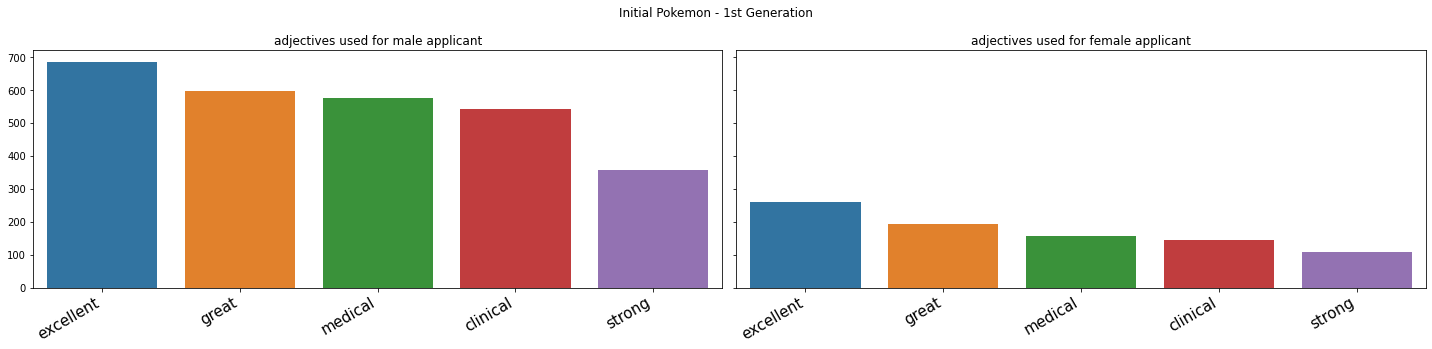

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

# Bulbasaur
ax_0 = axes[0]
ax_1 = axes[1]
sns.barplot(ax =ax_0, x=lor_male_adj_counts.index,y=lor_male_adj_counts.values)
ax_0.set_title("adjectives used for male applicant")

# Charmander
sns.barplot(ax = ax_1, x=lor_female_adj_counts.index,y=lor_female_adj_counts.values)
ax_1.set_title("adjectives used for female applicant")

ax_0.set_xticklabels(labels = lor_male_adj_counts.index,rotation='45', fontsize=15)
ax_1.set_xticklabels(labels = lor_female_adj_counts.index,rotation='45', fontsize=15)

fig.tight_layout()
plt.gcf().autofmt_xdate()


In [91]:
lor_male_lor_male_adj = pd.DataFrame(df_sentiment_male[df_sentiment_male.lor_gender == "male"].adj.sum(),columns=["adj"])
lor_male_lor_female_adj = pd.DataFrame(df_sentiment_male[df_sentiment_male.lor_gender == "female"].adj.sum(),columns=["adj"])
lor_female_lor_male_adj = pd.DataFrame(df_sentiment_female[df_sentiment_female.lor_gender == "male"].adj.sum(),columns=["adj"])
lor_female_lor_female_adj = pd.DataFrame(df_sentiment_female[df_sentiment_female.lor_gender == "female"].adj.sum(),columns=["adj"])

lor_male_lor_male_adj_counts     = lor_male_lor_male_adj.adj.value_counts().head(5)
lor_male_lor_female_adj_counts   = lor_male_lor_female_adj.adj.value_counts().head(5)
lor_female_lor_male_adj_counts   = lor_female_lor_male_adj.adj.value_counts().head(5)
lor_female_lor_female_adj_counts = lor_female_lor_female_adj.adj.value_counts().head(5)

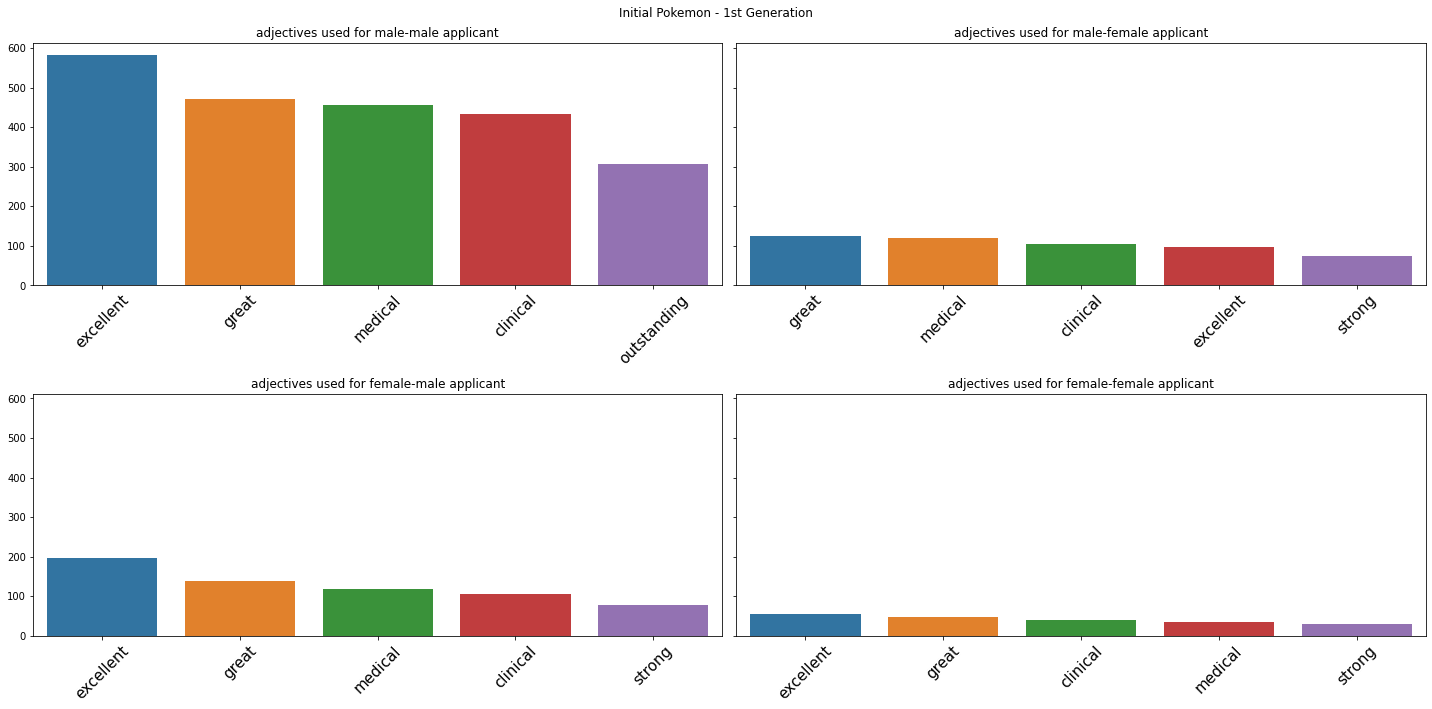

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

# Bulbasaur
ax_0 = axes[0,0]
ax_1 = axes[0,1]
ax_2 = axes[1,0]
ax_3 = axes[1,1]

sns.barplot(ax =ax_0, x=lor_male_lor_male_adj_counts.index,y=lor_male_lor_male_adj_counts.values)
ax_0.set_title("adjectives used for male-male applicant")

# Charmander
sns.barplot(ax = ax_1, x=lor_male_lor_female_adj_counts.index,y=lor_male_lor_female_adj_counts.values)
ax_1.set_title("adjectives used for male-female applicant")

sns.barplot(ax =ax_2, x=lor_female_lor_male_adj_counts.index,y=lor_female_lor_male_adj_counts.values)
ax_2.set_title("adjectives used for female-male applicant")

# Charmander
sns.barplot(ax = ax_3, x=lor_female_lor_female_adj_counts.index,y=lor_female_lor_female_adj_counts.values)
ax_3.set_title("adjectives used for female-female applicant")

ax_0.set_xticklabels(labels = lor_male_lor_male_adj_counts.index,rotation='45', fontsize=15)
ax_1.set_xticklabels(labels = lor_male_lor_female_adj_counts.index,rotation='45', fontsize=15)
ax_2.set_xticklabels(labels = lor_female_lor_male_adj_counts.index,rotation='45', fontsize=15)
ax_3.set_xticklabels(labels = lor_female_lor_female_adj_counts.index,rotation='45', fontsize=15)

fig.tight_layout()


In [63]:
# Sentence clustering

In [59]:
import hdbscan
from sentence_transformers import SentenceTransformer
import umap.umap_ as umap
model = SentenceTransformer('multi-qa-mpnet-base-dot-v1')

In [61]:
def bert_embedding(text):
    """
    Return BERT embeddings
    :param model: SentenceTransformer object
    :param text: strings to be embedded
    :return: array
    """
    bert_embeddings = model.encode(text, show_progress_bar = False)
    return bert_embeddings

In [ ]:
bert_embedding(text)

In [63]:
male_sentence_embedding = df_male_sentence.sentence_split.apply(bert_embedding)

In [ ]:
female_sentence_embedding = df_male_sentence.sentence_split.apply(bert_embedding)

In [ ]:
male_sentence_embedding = a

# Demographics Table

## Overall Column

In [64]:

overall_total_number_of_applicants = df_new.applicant_id.unique().shape[0]
print("total_number_of_applicants",overall_total_number_of_applicants)
overall_total_number_of_letters = df_new.shape[0]
print("total_number_of_letters",overall_total_number_of_letters)
overall_average_number_of_letters = overall_total_number_of_letters/overall_total_number_of_applicants
print("average_number_of_letters",overall_average_number_of_letters)
df_new_sentence = get_df_sentence(df_new, "lor")
overall_average_sentence_count_per_letter = df_new_sentence.shape[0]/df_new.shape[0]
print("average_sentence_count_per_letter",overall_average_sentence_count_per_letter)
df_new_sentence["word"] = df_new_sentence.sentence_split.apply(word_tokenize)
overall_total_word_count = df_new_sentence.word.str.len().sum()
overall_average_word_count_per_letter = overall_total_word_count/df_new.shape[0]
print("average_word_count_per_letter",overall_average_word_count_per_letter)
overall_male_writer_count = (df_new.lor_gender=="male").sum()
print("male_writer_count",overall_male_writer_count)

overall_female_writer_count = (df_new.lor_gender=="female").sum()
print("female_writer_count",overall_female_writer_count)
df_new["standard_position"] = ""
df_new.lor_position = df_new.lor_position.fillna("")

df_new.lor_position.value_counts()
overall_asso_prof_count = df_new.lor_position[df_new.lor_position.str.contains(r"asso[\w\.]*\s*prof[\w\.]*",case=False)].shape[0]
df_new.loc[df_new.lor_position.str.contains(r"asso[\w\.]*\s*prof[\w\.]*",case=False),"standard_position"] = "associate professor"
print("asso_prof_count",overall_asso_prof_count)

overall_assis_prof_count = df_new.lor_position[df_new.lor_position.str.contains(r"assi[\w\.]*\s*prof[\w\.]*",case=False)].shape[0]
df_new.loc[df_new.lor_position.str.contains(r"assi[\w\.]*\s*prof[\w\.]*",case=False),"standard_position"] = "assistant professor"
print("assis_prof_count",overall_assis_prof_count)

overall_prof_count = df_new.lor_position[ (~df_new.lor_position.str.contains(r"as[\w\.]*\s*prof[\w\.]*|assistant\s*clinical\s*prof[\w\.]|associate\s*clinical\s*prof[\w\.]*",case=False) & df_new.lor_position.str.contains("prof[\w\.]*",case=False))].shape[0]
df_new.loc[ ~df_new.lor_position.str.contains(r"as[\w\.]*\s*prof[\w\.]*|assistant\s*clinical\s*prof[\w\.]|associate\s*clinical\s*prof[\w\.]*",case=False) & df_new.lor_position.str.contains("prof[\w\.]*",case=False),"standard_position"] = "professor"
print("prof_count",overall_prof_count)
overall_others_count = df_new.lor_position[~df_new.lor_position.str.contains("prof[\w\.]*",case=False)].shape[0]
df_new.loc[~df_new.lor_position.str.contains("prof[\w\.]*",case=False),"standard_position"] = "others"


total_number_of_applicants 313
total_number_of_letters 964
average_number_of_letters 3.0798722044728435
average_sentence_count_per_letter 18.42116182572614
average_word_count_per_letter 346.4533195020747
male_writer_count 767
female_writer_count 183
asso_prof_count 155
assis_prof_count 236
prof_count 171


In [65]:
df_new.head(5)

applicant_id  application_year birth_year  citizenship  foreign  \
0             0            2017.0       1979          0.0        1   
1             0            2017.0       1979          0.0        1   
2             0            2017.0       1979          0.0        1   
4             1            2018.0       1975          0.0        1   
5             1            2018.0       1975          0.0        1   

  medical_school residency_school  md_year residency_year  step1  step2 step3  \
0           GATA             GATA   2004.0           2011  249.0  239.0   212   
1           GATA             GATA   2004.0           2011  249.0  239.0   212   
2           GATA             GATA   2004.0           2011  249.0  239.0   212   
4          Sanaa            Sanaa   2000.0           2007  189.0  197.0   200   
5          Sanaa            Sanaa   2000.0           2007  189.0  197.0   200   

   step_old  IMG class_rank honors received_offer language_skills interests  \
0       0.0  0.0        NaN    NaN              1         turkish       NaN   
1       0.0  0.0        NaN    NaN              1         turkish       NaN   
2       0.0  0.0        NaN    NaN              1         turkish       NaN   
4       0.0  0.0        NaN    NaN            NaN          arabic       NaN   
5       0.0  0.0        NaN    NaN            NaN          arabic       NaN   

   number_of_publications  speciality gender  \
0                    12.0         0.0   male   
1                    12.0         0.0   male   
2                    12.0         0.0   male   
4                     1.0         3.0   male   
5                     1.0         3.0   male   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               lor  \
0  Dear Dr. Dachman, It gives me pleasure to write this letter of recommendation on behalf of Dr. Nisa Cem OREN. Dr. OREN worked at the Near East University between 2016 and 2017 in the Department of Radiology. I have gotten to know him very well over a decade since I first met Dr. OREN when he was a resident under my super

In [66]:
def get_table_column(df,column_name):
    total_number_of_applicants = df.applicant_id.unique().shape[0]
    print(f"{column_name}_total_number_of_applicants",total_number_of_applicants)
    print(f"{column_name}_precentage_total_number_of_applicants",(total_number_of_applicants/overall_total_number_of_applicants)*100)
    
    total_number_of_letters = df.shape[0]
    print(f"{column_name}_total_number_of_letters",total_number_of_letters)
    print(f"{column_name}_precentage_total_number_of_letters",(total_number_of_letters/overall_total_number_of_letters)*100)
    
    average_number_of_letters = total_number_of_letters/total_number_of_applicants
    print(f"{column_name}_average_number_of_letters",average_number_of_letters)
    print(f"{column_name}_precentage_average_number_of_letters",(average_number_of_letters/overall_average_number_of_letters)*100)
    
    df_sentence = get_df_sentence(df, "lor")
    average_sentence_count_per_letter = df_sentence.shape[0]/df.shape[0]
    print(f"{column_name}_average_sentence_count_per_letter",average_sentence_count_per_letter)
    print(f"{column_name}_precentage_average_sentence_count_per_letter",(average_sentence_count_per_letter/overall_average_sentence_count_per_letter)*100)
    
    df_sentence["word"] = df_sentence.sentence_split.apply(word_tokenize)
    total_word_count = df_sentence.word.str.len().sum()
    average_word_count_per_letter = total_word_count/df.shape[0]
    print(f"{column_name}_average_word_count_per_letter",average_word_count_per_letter)
    print(f"{column_name}_precentage_average_word_count_per_letter",(average_word_count_per_letter/overall_average_word_count_per_letter)*100)
    
    male_writer_count = (df.lor_gender=="male").sum()
    print(f"{column_name}_male_writer_count",male_writer_count)
    print(f"{column_name}_precentage_male_writer_count",(male_writer_count/overall_male_writer_count)*100)
    
    female_writer_count = (df.lor_gender=="female").sum()
    print(f"{column_name}_female_writer_count",female_writer_count)
    print(f"{column_name}_precentage_female_writer_count",(female_writer_count/overall_female_writer_count)*100)
    
    df["standard_position"] = ""
    df.lor_position = df.lor_position.fillna("")

    df.lor_position.value_counts()
    asso_prof_count = df.lor_position.loc[df.lor_position.str.contains(r"asso[\w\.]*\s*prof[\w\.]*",case=False)].shape[0]
    print(f"{column_name}_asso_prof_count",asso_prof_count)
    print(f"{column_name}_precentage_asso_prof_count",(asso_prof_count/overall_asso_prof_count)*100)
    assis_prof_count = df.lor_position.loc[df.lor_position.str.contains(r"assi[\w\.]*\s*prof[\w\.]*",case=False)].shape[0]
    print(f"{column_name}_assis_prof_count",assis_prof_count)
    print(f"{column_name}_precentage_assis_prof_count",(assis_prof_count/overall_assis_prof_count)*100)
    prof_count = df.lor_position.loc[ ~df.lor_position.str.contains(r"as[\w\.]*\s*prof[\w\.]*|assistant\s*clinical\s*prof[\w\.]|associate\s*clinical\s*prof[\w\.]*",case=False) & df.lor_position.str.contains("prof[\w\.]*",case=False)].shape[0]
    print(f"{column_name}_prof_count",prof_count)
    print(f"{column_name}_precentage_prof_count",(prof_count/overall_prof_count)*100)
    others_count = df.lor_position.loc[~df.lor_position.str.contains("prof[\w\.]*",case=False)].shape[0]
    print(f"{column_name}others_count",others_count)
    print(f"{column_name}_precentage_others_count",(others_count/overall_others_count)*100)

In [67]:
df_male = df_new.loc[df_new.gender == "male"]
get_table_column(df_male,"male")

male_total_number_of_applicants 244
male_precentage_total_number_of_applicants 77.95527156549521
male_total_number_of_letters 753
male_precentage_total_number_of_letters 78.11203319502074
male_average_number_of_letters 3.0860655737704916
male_precentage_average_number_of_letters 100.20109176246513


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


male_average_sentence_count_per_letter 18.308100929614874
male_precentage_average_sentence_count_per_letter 99.38624448782936
male_average_word_count_per_letter 346.269588313413
male_precentage_average_word_count_per_letter 99.94696798145108
male_male_writer_count 610
male_precentage_male_writer_count 79.53063885267275
male_female_writer_count 135
male_precentage_female_writer_count 73.77049180327869
male_asso_prof_count 120
male_precentage_asso_prof_count 77.41935483870968
male_assis_prof_count 176
male_precentage_assis_prof_count 74.57627118644068
male_prof_count 134
male_precentage_prof_count 78.3625730994152
maleothers_count 319
male_precentage_others_count 80.35264483627203


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [68]:
df_female = df_new.loc[df_new.gender == "female"]
get_table_column(df_female,"female")

female_total_number_of_applicants 69
female_precentage_total_number_of_applicants 22.044728434504794
female_total_number_of_letters 211
female_precentage_total_number_of_letters 21.887966804979254
female_average_number_of_letters 3.0579710144927534
female_precentage_average_number_of_letters 99.28889289794935


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


female_average_sentence_count_per_letter 18.819905213270143
female_precentage_average_sentence_count_per_letter 102.16459412992688
female_average_word_count_per_letter 347.1469194312796
female_precentage_average_word_count_per_letter 100.20020011071095
female_male_writer_count 157
female_precentage_male_writer_count 20.469361147327252
female_female_writer_count 48
female_precentage_female_writer_count 26.229508196721312
female_asso_prof_count 35
female_precentage_asso_prof_count 22.58064516129032
female_assis_prof_count 60
female_precentage_assis_prof_count 25.423728813559322
female_prof_count 37
female_precentage_prof_count 21.637426900584796
femaleothers_count 78
female_precentage_others_count 19.64735516372796


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [69]:
df_new.columns

Index(['applicant_id', 'application_year', 'birth_year', 'citizenship',
       'foreign', 'medical_school', 'residency_school', 'md_year',
       'residency_year', 'step1', 'step2', 'step3', 'step_old', 'IMG',
       'class_rank', 'honors', 'received_offer', 'language_skills',
       'interests', 'number_of_publications', 'speciality', 'gender', 'lor',
       'lor_position', 'lor_university', 'lor_gender', 'lor_number', 'lor_id',
       'standard_position'],
      dtype='object')

In [70]:
df_foreign = df_new.loc[df_new.foreign == 1]
get_table_column(df_foreign,"foreign")

foreign_total_number_of_applicants 90
foreign_precentage_total_number_of_applicants 28.753993610223645
foreign_total_number_of_letters 282
foreign_precentage_total_number_of_letters 29.253112033195023
foreign_average_number_of_letters 3.1333333333333333
foreign_precentage_average_number_of_letters 101.73582295988935


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


foreign_average_sentence_count_per_letter 18.01418439716312
foreign_precentage_average_sentence_count_per_letter 97.79070705521595
foreign_average_word_count_per_letter 342.9078014184397
foreign_precentage_average_word_count_per_letter 98.97662458863704
foreign_male_writer_count 245
foreign_precentage_male_writer_count 31.94263363754889
foreign_female_writer_count 35
foreign_precentage_female_writer_count 19.12568306010929
foreign_asso_prof_count 34
foreign_precentage_asso_prof_count 21.935483870967744
foreign_assis_prof_count 55
foreign_precentage_assis_prof_count 23.30508474576271
foreign_prof_count 56
foreign_precentage_prof_count 32.748538011695906
foreignothers_count 136
foreign_precentage_others_count 34.25692695214106


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [71]:
df_foreign = df_new.loc[df_new.foreign == 0]
get_table_column(df_foreign,"not_foreign")

not_foreign_total_number_of_applicants 223
not_foreign_precentage_total_number_of_applicants 71.24600638977637
not_foreign_total_number_of_letters 682
not_foreign_precentage_total_number_of_letters 70.74688796680498
not_foreign_average_number_of_letters 3.0582959641255605
not_foreign_precentage_average_number_of_letters 99.29944364847515


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


not_foreign_average_sentence_count_per_letter 18.587976539589445
not_foreign_precentage_average_sentence_count_per_letter 100.90556022167037
not_foreign_average_word_count_per_letter 347.9310850439883
not_foreign_precentage_average_word_count_per_letter 100.42654102550885
not_foreign_male_writer_count 522
not_foreign_precentage_male_writer_count 68.0573663624511
not_foreign_female_writer_count 148
not_foreign_precentage_female_writer_count 80.87431693989072
not_foreign_asso_prof_count 121
not_foreign_precentage_asso_prof_count 78.06451612903226
not_foreign_assis_prof_count 181
not_foreign_precentage_assis_prof_count 76.69491525423729
not_foreign_prof_count 115
not_foreign_precentage_prof_count 67.2514619883041
not_foreignothers_count 261
not_foreign_precentage_others_count 65.74307304785894


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Word Analysis

In [72]:
import pandas as pd
df_word_list = pd.read_excel("LOR Project_reviewed.xlsx",sheet_name="Word list")

In [73]:

df_word_list.head(1)

Agency  Communality   Grindstone Standout  Social Radiology  Unnamed: 6  \
0  Achieve*   Affection*   Hardworking     Star  Child*  Good eye         NaN   

   Unnamed: 7 Unnamed: 8  
0         NaN        NaN

In [74]:
agency = df_word_list["Agency"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()
communality = df_word_list["Communality"].str.strip().str.lower().str.replace(r"\*",r"\\w\*").dropna().tolist()
grindstone = df_word_list["Grindstone"].str.strip().str.lower().str.replace(r"\*",r"\\w\*").dropna().tolist()
standout = df_word_list["Standout"].str.strip().str.lower().str.replace(r"\*",r"\\w\*").dropna().tolist()
social = df_word_list["Social"].str.strip().str.lower().str.replace(r"\*",r"\\w\*").dropna().tolist()
radiology = df_word_list["Radiology"].str.strip().str.lower().str.replace(r"\*",r"\\w\*").dropna().tolist()


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True 

In [75]:
agency_pattern = r"\b" + r"\b|\b".join(agency) + r"\b"
communality_pattern = r"\b" + r"\b|\b".join(communality) + r"\b"
grindstone_pattern = r"\b" + r"\b|\b".join(grindstone) + r"\b"
standout_pattern = r"\b" + r"\b|\b".join(standout) + r"\b"
social_pattern = r"\b" + r"\b|\b".join(social) + r"\b"
radiology_pattern = r"\b" + r"\b|\b".join(radiology) + r"\b"


In [76]:
df_female = df_new.loc[(df_new.gender == "female")]
df_male = df_new.loc[(df_new.gender == "male")]
df_writer_male = df_new.loc[(df_new.lor_gender == "male")]
df_writer_female = df_new.loc[(df_new.lor_gender == "female")]
df_prof = df_new.loc[df_new.standard_position == "professor"]
df_asso_prof = df_new.loc[df_new.standard_position == "associate professor"]
df_asis_prof = df_new.loc[df_new.standard_position == "assistant professor"]
df_other = df_new.loc[df_new.standard_position == "others"]

In [77]:
def get_word_result(df,column_name):
    df_sentence = get_df_sentence(df, "lor")
    df_sentence["word"] = df_sentence.sentence_split.apply(word_tokenize)
    overall_total_word_count = df_sentence.word.str.len().sum()

    found_words_list = df.lor.str.lower().str.findall(agency_pattern).sum()    

    if type(found_words_list) == list:
        agency_result = len(found_words_list)
    else:
        agency_result = 0
    print(f"{column_name}_agency_result",agency_result)
    print(f"{column_name}_percentage_agency_result: %",(agency_result/overall_total_word_count)*100)
    
    found_words_list = df.lor.str.lower().str.findall(communality_pattern).sum()
    if type(found_words_list) == list:
        communality_result = len(found_words_list)
    else:
        communality_result = 0
        
    print(f"{column_name}_communality_result",communality_result)
    print(f"{column_name}_percentage_communality_result: %",(communality_result/overall_total_word_count)*100)
    
    found_words_list = df.lor.str.lower().str.findall(grindstone_pattern).sum()
    if type(found_words_list) == list:
        grindstone_result = len(found_words_list)
    else:
        grindstone_result = 0
    print(f"{column_name}_grindstone_result",grindstone_result)
    print(f"{column_name}_percentage__grindstone_result: %",(grindstone_result/overall_total_word_count)*100)
    
    found_words_list = df.lor.str.lower().str.findall(standout_pattern).sum()
    if type(found_words_list) == list:
        standout_result = len(found_words_list)
    else:
        standout_result = 0
    print(f"{column_name}_standout_result",standout_result)
    print(f"{column_name}_percentage_standout_result: %",(standout_result/overall_total_word_count)*100)
    
    found_words_list = df.lor.str.lower().str.findall(social_pattern).sum()
    if type(found_words_list) == list:
        social_result = len(found_words_list)
    else:
        social_result = 0
    print(f"{column_name}_social_result",social_result)
    print(f"{column_name}_percentage_social_result: %",(social_result/overall_total_word_count)*100)
    
    
    found_words_list = df.lor.str.lower().str.findall(radiology_pattern).sum()
    if type(found_words_list) == list:
        radiology_result = len(found_words_list)
    else:
        radiology_result = 0

    print(f"{column_name}_radiology_result",radiology_result)
    print(f"{column_name}_percentage_radiology_result: %",(radiology_result/overall_total_word_count)*100)

In [78]:
get_word_result(df_male,"applicant_male")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


applicant_male_agency_result 3138
applicant_male_percentage_agency_result: % 1.2034931215267257
applicant_male_communality_result 645
applicant_male_percentage_communality_result: % 0.2473719131245182
applicant_male_grindstone_result 644
applicant_male_percentage__grindstone_result: % 0.24698839077858872
applicant_male_standout_result 944
applicant_male_percentage_standout_result: % 0.3620450945574344
applicant_male_social_result 55
applicant_male_percentage_social_result: % 0.021093729026121708
applicant_male_radiology_result 149
applicant_male_percentage_radiology_result: % 0.05714482954349335


In [79]:
get_word_result(df_female,"applicant_female")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


applicant_female_agency_result 943
applicant_female_percentage_agency_result: % 1.2874071647007428
applicant_female_communality_result 205
applicant_female_percentage_communality_result: % 0.279871122761031
applicant_female_grindstone_result 164
applicant_female_percentage__grindstone_result: % 0.2238968982088248
applicant_female_standout_result 248
applicant_female_percentage_standout_result: % 0.3385757972913936
applicant_female_social_result 17
applicant_female_percentage_social_result: % 0.023208824814329402
applicant_female_radiology_result 54
applicant_female_percentage_radiology_result: % 0.0737221494102228


In [80]:
get_word_result(df_writer_male,"writer_male")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


writer_male_agency_result 3215
writer_male_percentage_agency_result: % 1.2296194872697093
writer_male_communality_result 645
writer_male_percentage_communality_result: % 0.24668882404011275
writer_male_grindstone_result 619
writer_male_percentage__grindstone_result: % 0.23674477841989114
writer_male_standout_result 966
writer_male_percentage_standout_result: % 0.36945954112054097
writer_male_social_result 57
writer_male_percentage_social_result: % 0.02180040770587043
writer_male_radiology_result 153
writer_male_percentage_radiology_result: % 0.05851688384207325


In [81]:
get_word_result(df_writer_female,"writer_female")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


writer_female_agency_result 828
writer_female_percentage_agency_result: % 1.2107033191987133
writer_female_communality_result 188
writer_female_percentage_communality_result: % 0.27489399034946627
writer_female_grindstone_result 180
writer_female_percentage__grindstone_result: % 0.26319637373885074
writer_female_standout_result 217
writer_female_percentage_standout_result: % 0.3172978505629478
writer_female_social_result 15
writer_female_percentage_social_result: % 0.021933031144904226
writer_female_radiology_result 46
writer_female_percentage_radiology_result: % 0.06726129551103963


In [82]:
get_word_result(df_prof,"prof")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


prof_agency_result 715
prof_percentage_agency_result: % 1.161940359145202
prof_communality_result 154
prof_percentage_communality_result: % 0.2502640773543512
prof_grindstone_result 132
prof_percentage__grindstone_result: % 0.2145120663037296
prof_standout_result 275
prof_percentage_standout_result: % 0.44690013813276996
prof_social_result 13
prof_percentage_social_result: % 0.02112618834809458
prof_radiology_result 39
prof_percentage_radiology_result: % 0.06337856504428374


In [83]:
get_word_result(df_asso_prof,"asso")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


asso_agency_result 756
asso_percentage_agency_result: % 1.2660347657165825
asso_communality_result 159
asso_percentage_communality_result: % 0.2662692165991225
asso_grindstone_result 152
asso_percentage__grindstone_result: % 0.2545466724721171
asso_standout_result 216
asso_percentage_standout_result: % 0.3617242187761664
asso_social_result 12
asso_percentage_social_result: % 0.020095789932009243
asso_radiology_result 40
asso_percentage_radiology_result: % 0.06698596644003081


In [84]:
get_word_result(df_asis_prof,"asis")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


asis_agency_result 999
asis_percentage_agency_result: % 1.2523976080333974
asis_communality_result 184
asis_percentage_communality_result: % 0.23067183170985495
asis_grindstone_result 196
asis_percentage__grindstone_result: % 0.24571564682136726
asis_standout_result 256
asis_percentage_standout_result: % 0.3209347223789286
asis_social_result 15
asis_percentage_social_result: % 0.01880476888939035
asis_radiology_result 44
asis_percentage_radiology_result: % 0.05516065540887836


In [85]:
get_word_result(df_other,"others")



c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


others_agency_result 1593
others_percentage_agency_result: % 1.2130488417782244
others_communality_result 348
others_percentage_communality_result: % 0.2649974870927948
others_grindstone_result 327
others_percentage__grindstone_result: % 0.249006259423402
others_standout_result 442
others_percentage_standout_result: % 0.3365772680891244
others_social_result 32
others_percentage_social_result: % 0.02436758502002711
others_radiology_result 79
others_percentage_radiology_result: % 0.06015747551819193
